# data analysis
# data analysis
# data analysis
# data analysis
# data analysis

youtube_project_0915_10am.db

regional features are only extracted for channel - "UCFSb_tOQQJtBJsOiakWqhgQ", index - 331 (done) and before

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
df = pd.read_sql_query("SELECT * from videos_makeup", conn)
conn.close

<function Connection.close>

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500

In [4]:
df.dtypes

channel_id              object
subscriptions_count      int64
videos_count             int64
video_id                object
video_views              int64
video_title             object
video_date              object
hue                    float64
saturation             float64
brightness_global      float64
dynamic_range          float64
contrast_Mic           float64
contrast_RMS           float64
len_title                int64
ratio_bc_fr            float64
bri_fr_mean            float64
bri_bc_mean            float64
bri_diff_mean          float64
contrast_bc            float64
contrast_fr            float64
contrast_diff          float64
sat_bc                 float64
dtype: object

In [22]:
df.head(n=3)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836
2,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Lnbd9RQceNQ,152645,Grunge Cranberry Smokey Eye,5 days ago,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,0.604055,0.597575,0.604280,-0.006705,0.170278,0.196231,0.025953,0.124208


## Plot distribution of 
### For videos distribution:
1. views vs. video (√)
2. views/subscription vs. video (√)

### For channel distribution:
1. channel subscriptions vs. channel (√)
2. total videos vs. channel (√)
3. mean of (views/videos) vs. channel
4. mean of (views/videos/subscriptions) vs. channel


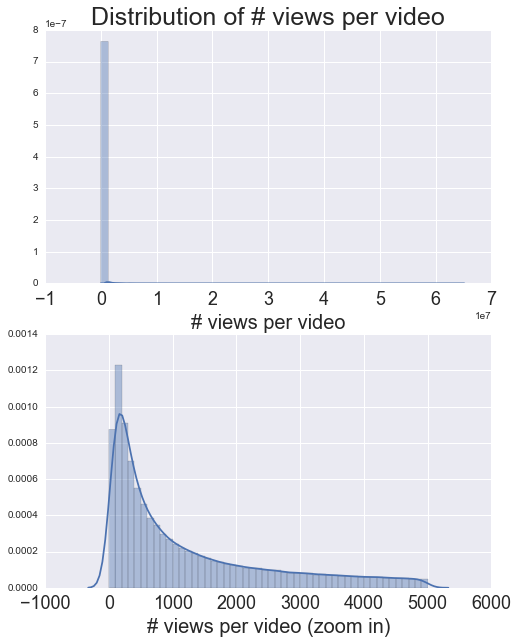

In [9]:
####################################
# plot number of views for each video

y_views_of_video = df['video_views'].tolist()
y_views_of_video_zoom = [x for x in y_views_of_video if x < 5000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_views_of_video)
plt.xlabel('# views per video', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of # views per video', fontsize=25)
#plt.savefig('distribution_views_per_video.pdf')

plt.subplot(2, 1, 2)
sns.distplot(y_views_of_video_zoom)
plt.xlabel('# views per video (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_per_video.pdf')

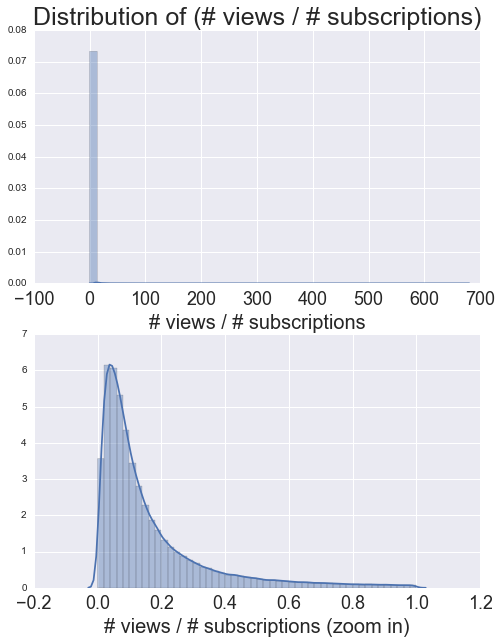

In [10]:
####################################
# plot views/subscriptions for each video

y_subscriptions = df['subscriptions_count'].tolist()
y_videws_div_subs = [x / y for x,y in zip(y_views_of_video, y_subscriptions)]

y_videws_div_subs_zoom = [x for x in y_videws_div_subs if x < 1]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_videws_div_subs)
plt.xlabel('# views / # subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of (# views / # subscriptions)', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_videws_div_subs_zoom)
plt.xlabel('# views / # subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_div_subs_per_video.pdf')

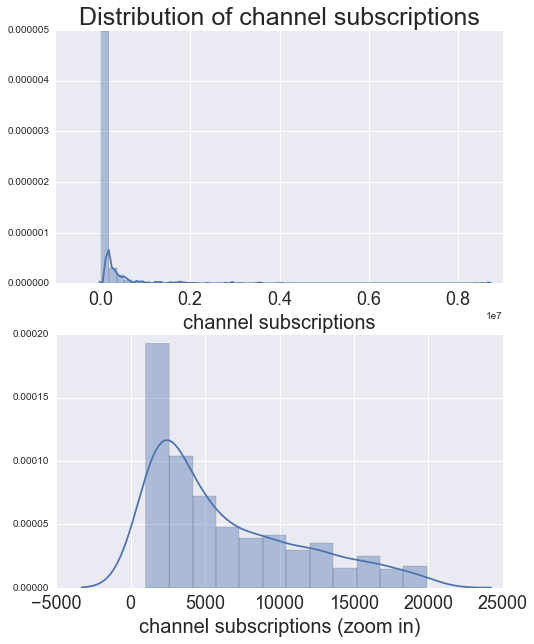

In [11]:
####################################
# plot channel subscriptions 
y_subscriptions_set = list(set(y_subscriptions)) # remove all duplicates

y_subscriptions_set_zoom = [x for x in y_subscriptions_set if x < 20000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_subscriptions_set)
plt.xlabel('channel subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of channel subscriptions', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_subscriptions_set_zoom)
plt.xlabel('channel subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_channel_subscriptions.pdf')

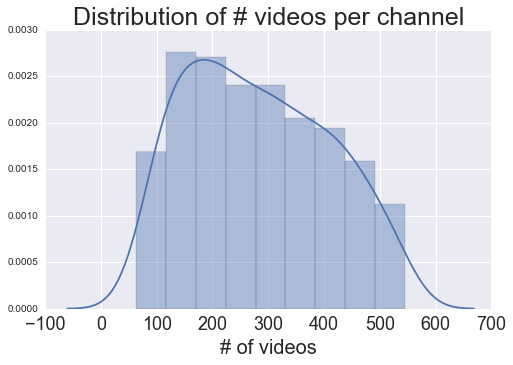

In [12]:
####################################
# plot (number of videos) per channel
y_videos_count = df['videos_count'].tolist()
y_videos_count_set = list(set(y_videos_count)) # remove all duplicates

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_count_set)
plt.xlabel('# of videos', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of # videos per channel', fontsize=25)
fig.savefig('distribution_videos_count.pdf')

In [23]:
df.head(2)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


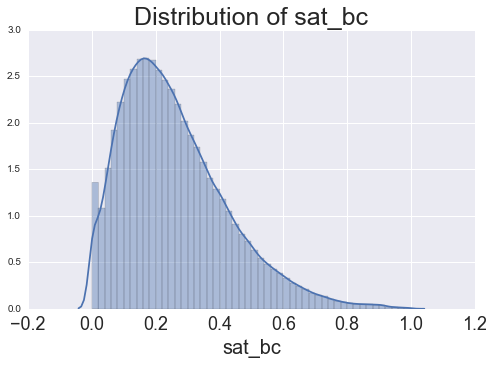

In [27]:
####################################
# plot (number of videos) per channel
y_videos_sat_bc = df['sat_bc'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_sat_bc)
plt.xlabel('sat_bc', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of sat_bc', fontsize=25)

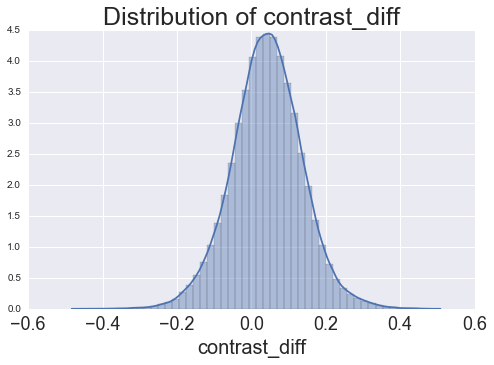

In [26]:
####################################
# plot (number of videos) per channel
y_videos_contrast_diff = df['contrast_diff'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_diff)
plt.xlabel('contrast_diff', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_diff', fontsize=25)

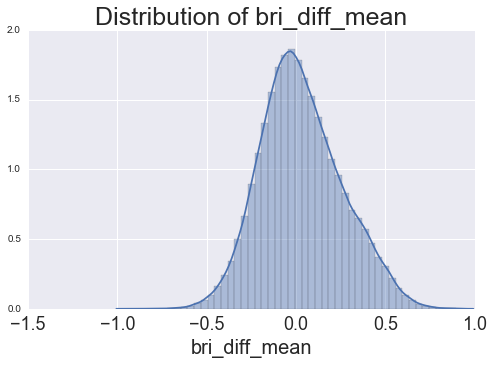

In [25]:
####################################
# plot (number of videos) per channel
y_videos_bri_diff_mean = df['bri_diff_mean'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_bri_diff_mean)
plt.xlabel('bri_diff_mean', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of bri_diff_mean', fontsize=25)

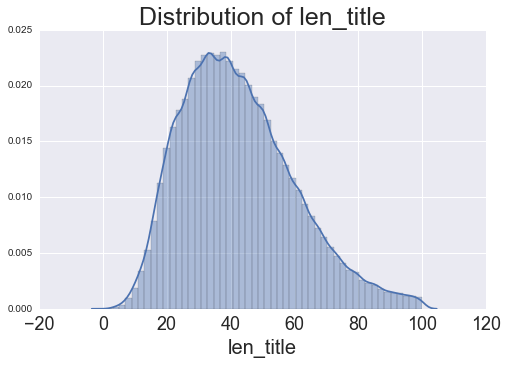

In [17]:
####################################
# plot (number of videos) per channel
y_videos_len_title = df['len_title'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_len_title)
plt.xlabel('len_title', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of len_title', fontsize=25)

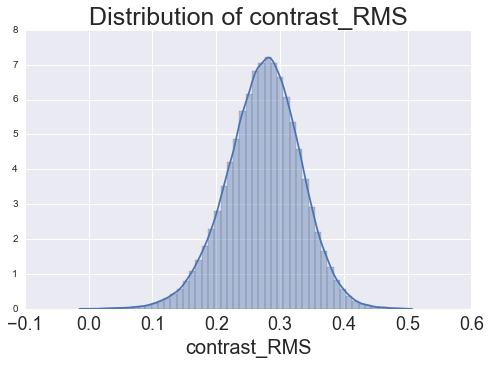

In [16]:
####################################
# plot (number of videos) per channel
y_videos_contrast_RMS = df['contrast_RMS'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_RMS)
plt.xlabel('contrast_RMS', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_RMS', fontsize=25)

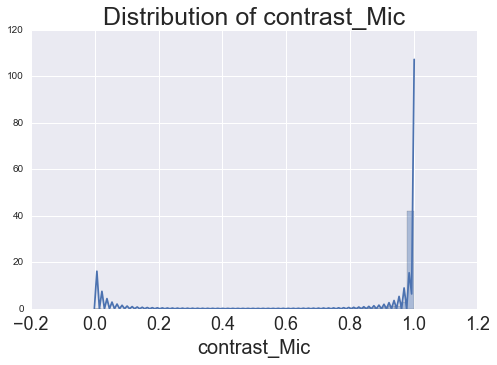

In [15]:
####################################
# plot (number of videos) per channel
y_videos_contrast_Mic = df['contrast_Mic'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_Mic)
plt.xlabel('contrast_Mic', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_Mic', fontsize=25)

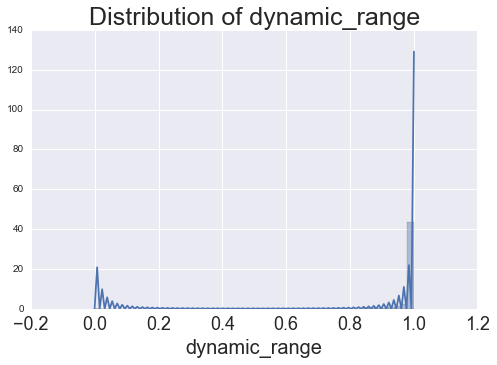

In [14]:
####################################
# plot (number of videos) per channel
y_videos_dyn = df['dynamic_range'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_dyn)
plt.xlabel('dynamic_range', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of dynamic_range', fontsize=25)

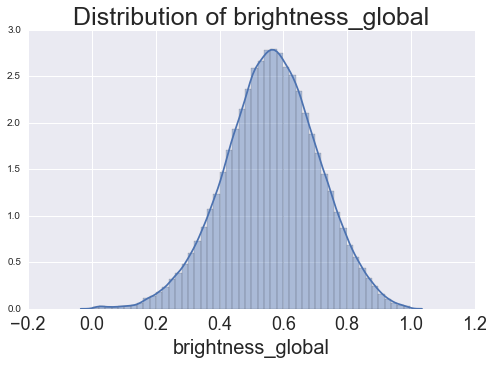

In [13]:
####################################
# plot (number of videos) per channel
y_videos_bri = df['brightness_global'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_bri)
plt.xlabel('brightness_global', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of brightness_global', fontsize=25)

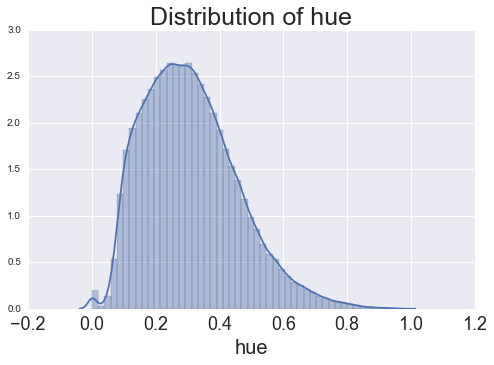

In [10]:
####################################
# plot (number of videos) per channel
y_videos_hue = df['hue'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_hue)
plt.xlabel('hue', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of hue', fontsize=25)
#fig.savefig('distribution_videos_count.pdf')

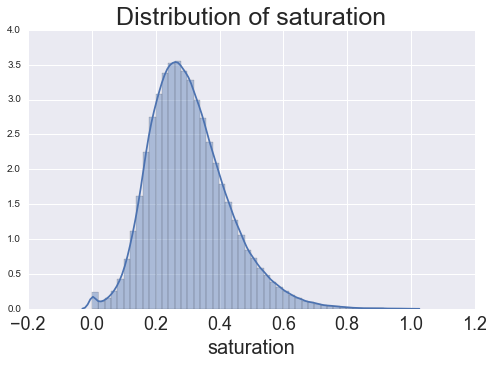

In [12]:
####################################
# plot (number of videos) per channel
y_videos_saturation = df['saturation'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_saturation)
plt.xlabel('saturation', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of saturation', fontsize=25)
#fig.savefig('distribution_videos_count.pdf')

In [14]:
# connect to sqlite3
conn = sqlite3.connect('youtube_project_0915_10am.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [73]:
conn.close

<function Connection.close>

In [15]:
# get the list of all channels, ordered by their id
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup ORDER BY channel_id'):
    channel_scraped.append(row[0])
len(channel_scraped)

1281

In [16]:
# compute summary informtion of each channel:
# channel subscriptions, total videos, total views, average views, average views/subs
channel_summary = [] 
for channel in channel_scraped:
    # find the total number of videos
    print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_1.execute("SELECT COUNT(*) FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        videos_count = row[0]
        print ("Channel - {0} has {1} videos".format(channel, videos_count))
    # find the total views of a channel, and its subscriptions
    views_total = 0
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        views_total = views_total + row[4]
        channel_subs = row[1]
    #print("This channel has in total {0} views".format(views_total))
    # compute mean of views
    average_views = views_total / videos_count
    #print("Each video of this channel has on average {0} views.".format(average_views))
    # compute mean of views / subscriptions
    average_views_div_subs = average_views / channel_subs
    #print("Each video of this channel has on average {0} views/subscriptions.".format(average_views_div_subs))
    channel_summary.append([channel_subs, videos_count, views_total, average_views, average_views_div_subs])
    

Channel index is 0
Channel - UC-0_aCN0_CSiJ6s7ryG2EtA has 216 videos
Channel index is 1
Channel - UC-1D8zLe0x0cbN7we5a60tw has 113 videos
Channel index is 2
Channel - UC-2PHolhimwX9q7rH0ZvVBQ has 272 videos
Channel index is 3
Channel - UC-5LNANFKTC1DOkuhbeq6OQ has 314 videos
Channel index is 4
Channel - UC-6vn5Qr-Ii73A8n3KOHsLg has 390 videos
Channel index is 5
Channel - UC-BHWT2qAsBR9fFoN96vLHw has 108 videos
Channel index is 6
Channel - UC-Hyk0VXmjfwxVgh5usrTDw has 104 videos
Channel index is 7
Channel - UC-LrxyeSD_L9Ul1e0SsbmYg has 143 videos
Channel index is 8
Channel - UC-Q7O71xFCDcn-w1M6kRubQ has 286 videos
Channel index is 9
Channel - UC-QSKUvM_sBxph2LIV9aLBg has 227 videos
Channel index is 10
Channel - UC-RX7Rb0D8xmWGWIwL8kvmQ has 403 videos
Channel index is 11
Channel - UC-THoU3XcvNhhnSOAxrGx7Q has 306 videos
Channel index is 12
Channel - UC-TfplNkeMMPhs9aqntfYvA has 211 videos
Channel index is 13
Channel - UC-V2ze2c4s7rV4neMd7ZS-w has 389 videos
Channel index is 14
Channel - 

In [17]:
print(channel_summary[0])

[2587, 216, 253516, 1173.6851851851852, 0.45368580795716473]


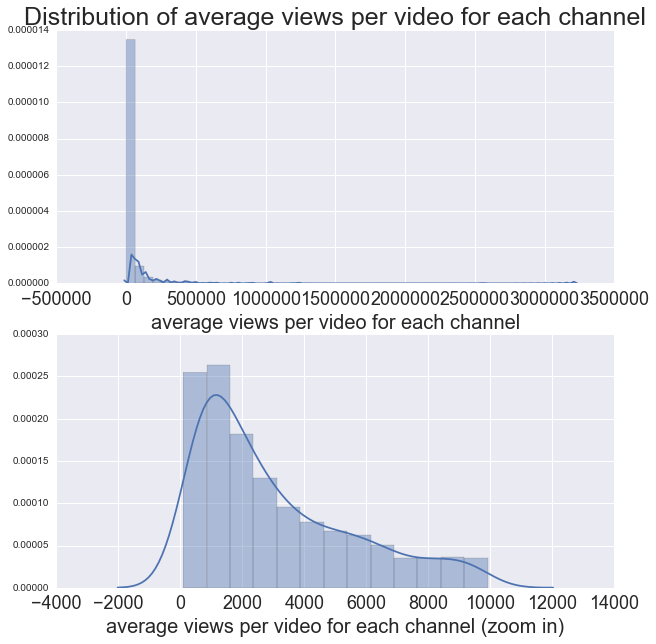

In [18]:
###############################################
# the average views per video for each channel 
channel_average_views_per_video = [x[3] for x in channel_summary]
channel_average_views_per_video_zoom = [x for x in channel_average_views_per_video if x < 10000]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.distplot(channel_average_views_per_video)
plt.xlabel('average views per video for each channel', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(channel_average_views_per_video_zoom)
plt.xlabel('average views per video for each channel (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_average_views_per_video.pdf')

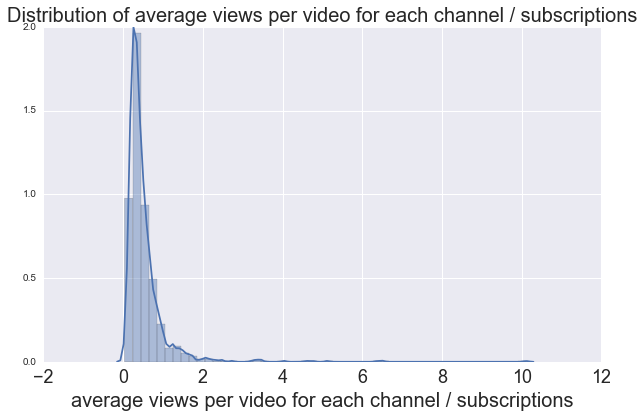

In [19]:
###############################################
# the average views per video for each channel / subscription
channel_average_views_per_video_div_subs = [x[4] for x in channel_summary]
#channel_average_views_per_video_div_subs_zoom = [x for x in channel_average_views_per_video_div_subs if x < 10000]

fig = plt.figure(figsize=(10,6))

sns.distplot(channel_average_views_per_video_div_subs)
plt.xlabel('average views per video for each channel / subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel / subscriptions', fontsize=20)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_average_views_per_video_div_subs.pdf')

## Plot some relations
### 1. average views per video vs. subscriptions

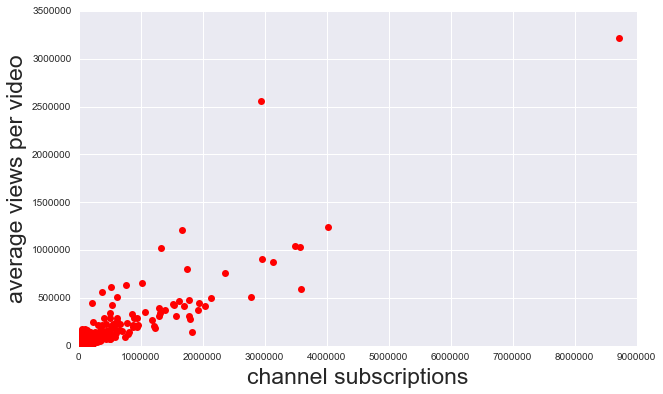

In [21]:
################################################
# plot average views per video vs. subscriptions
channel_subscriptions = [x[0] for x in channel_summary]
fig = plt.figure(figsize=(10,6))
plt.plot(channel_subscriptions, channel_average_views_per_video, 'ro')
plt.xlabel('channel subscriptions', fontsize=23)
plt.ylabel('average views per video', fontsize=23)
#plt.xticks(fontsize=18)
fig.savefig('relation_average_views_vs_subs.pdf')

## Save the classifiers
## Save the classifiers
## Save the classifiers

In [150]:
##########################
# train the model
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

##########################
# save the model
from sklearn.externals import joblib
joblib.dump(clf, 'model_DTs_global_depth_2.pkl') 

##########################
# load the model
clf2 = joblib.load('model_DTs_global_depth_2.pkl') 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [161]:
y_prediction = clf2.predict(x_test)

## SVM

In [72]:
#############################
###### SVM classifier #######
#############################
from sklearn.svm import SVC

# compute test/training error vs. gamma --> overfit or underfit

gamma_list = np.logspace(0, 1, 2).tolist()
err_train_list = []
err_test_list = []
for x in gamma_list:
    print("************************************")
    print(gamma_list.index(x))
    print("gamma is {0}".format(x))
    clf = SVC(gamma=x)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print("Done computing training/test errors vs. gamma")
err_svm = min(err_test_list) * 100

************************************
0
gamma is 1.0
Done model learning
The test error is 0.40863513035271914
The train error is 0.4485704896483733
************************************
1
gamma is 10.0
Done model learning
The test error is 0.4301049899728677
The train error is 0.40375135872999823
Done computing training/test errors vs. gamma


# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [29]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
df = pd.read_sql_query("SELECT * from videos_makeup", conn)
conn.close

<function Connection.close>

In [58]:
######################################################################################
####### define functions to compute performance of different models/algorithms #######
######################################################################################

# compute F1 score
def get_score (correct_class, predicted_class):
    correct = correct_class.tolist()
    pred = predicted_class.tolist()
    TP = 0
    FP = 0
    FN = 0
    for i in range(0, len(correct)):
        TP += int((correct[i] == 2) & (pred[i] == 2))
        FP += int((correct[i] == 1) & (pred[i] == 2))
        FN += int((correct[i] == 2) & (pred[i] == 1))
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)
    score = 2 * precision * recall / (precision + recall)
    return (score)

# compute test/traing error
def get_error (correct_class, predicted_class):
    diff = correct_class - predicted_class
    diff = diff.tolist()
    err = 1 - diff.count(0)/len(diff)
    return (err)

# compute mean absolute error for regression
def get_mean_abs_error (correct_class, predicted_class):
    y_corr = correct_class.tolist()
    y_pre = predicted_class.tolist()
    y_mean = sum(y_corr)/len(y_corr)
    error_all = []
    for i in range(0, len(y_corr)):
        err = abs(y_pre[i] - y_corr[i]) / y_corr[i]
        error_all.append(err)
    return (sum(error_all) / len(error_all))

In [90]:
df.head(20)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836
2,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Lnbd9RQceNQ,152645,Grunge Cranberry Smokey Eye,5 days ago,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,0.604055,0.597575,0.604280,-0.006705,0.170278,0.196231,0.025953,0.124208
3,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_aaa-zeH6zo,201716,HOW I DID MY MAKEUP IN HIGH SCHOOL!,1 week ago,0.411592,0.144167,0.617192,0.968627,1.000000,0.217338,35,1.014127,0.603462,0.630730,-0.027268,0.163748,0.248388,0.084640,0.068869
4,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_f6ahQn7Zgw,90022,100 LAYERS OF SHIRTS,1 week ago,0.348731,0.062799,0.733219,1.000000,1.000000,0.159050,20,0.506237,0.726282,0.746922,-0.020640,0.124953,0.173367,0.048414,0.017100
5,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,raGGv1fJ0KQ,135053,GRWM: Travel Edition!,2 weeks ago,0.255529,0.113663,0.650379,0.980392,1.000000,0.224032,21,0.712298,0.635376,0.671441,-0.036065,0.120141,0.267921,0.147781,0.030162
6,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Dv3NI7dkin8,895750,My 10 Minute Everyday Makeup Routine!,3 weeks ago,0.445652,0.142542,0.663062,0.894118,1.000000,0.227559,37,0.510344,0.648091,0.692396,-0.044305,0.152246,0.223679,0.071433,0.035897
7,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,yf1oB6LZ_t0,267486,"Kylie Cosmetics Birthday Collection Review, Tu...",3 weeks ago,0.383546,0.164827,0.692210,0.941176,0.888889,0.302527,64,0.522480,0.589250,0.889269,-0.300018,0.133448,0.314876,0.181428,0.044246
8,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Xy0cOEVGBt4,171127,GRWM: Summer Date Night,3 weeks ago,0.166745,0.219205,0.635536,1.000000,1.000000,0.297267,23,0.388554,0.593798,0.742952,-0.149154,0.310371,0.281156,-0.029215,0.073894
9,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,O_AA4KQ2uC8,370506,Drugstore Glam: Holographic Glitter Cut Crease,4 weeks ago,0.150686,0.247522,0.633180,1.000000,1.000000,0.240175,46,0.541137,0.578623,0.733998,-0.155374,0.143086,0.263331,0.120245,0.107818


In [33]:
df.iloc[1:2, 7:14]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title
1,0.517865,0.138269,0.819456,0.968627,0.94636,0.210627,40


In [92]:
pd.concat([df.ix[:,1],df.ix[:,7:]], axis=1).head(2)

,subscriptions_count,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,671404,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,671404,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


In [224]:
df_all.iloc[:2, 7:23]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,makeup
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,1


In [227]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

# incorporate title indicator vector
df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

df_training = df_all.iloc[:size_training, :]
df_test = df_all.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:].values
#x_train = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values
x_train = pd.concat([df_training.ix[:,1],df_training.ix[:,7:222]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:].values
#x_test = pd.concat([df_test.ix[:,7:14],df_test.ix[:,22:]], axis=1).values
x_test = pd.concat([df_test.ix[:,1],df_test.ix[:,7:222]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

In [4]:
####################################################
### convert continuous values to discrete values ###
####################################################

def get_class (list_before, num_label):
    list_sort = sorted(list_before)
    volume = int(len(list_before)/num_label)
    thre = []
    for i in range(1, num_label):
        thre.append(list_sort[i*volume])
    #print ("The threshold for classification:")
    #print (thre)
    list_after = []
    for x in list_before:
        label = 0
        for threshold in thre:
            if x < threshold:
                label = thre.index(threshold) + 1
                break
        if label == 0:
            label = len(thre) + 1
        list_after.append(label)
    #print ("Done categoring")
    return list_after 

In [210]:
#######################################
# classify targests into multi-labels
from numpy  import array

y = df.iloc[:,4].values.tolist()
y_label = get_class(y, 3)

y_train = array(y_label[:size_training])

y_test = array(y_label[size_training:size_data])


## Logistic regression
## Logistic regression

In [228]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
y_precision = precision_score(y_test, y_prediction, average='binary')
y_recall = recall_score(y_test, y_prediction, average='binary') 
print ("The precision is {0}".format(y_precision))
print ("The recall is {0}".format(y_recall))

Done model learning
The precision is 0.6863137059161748
The recall is 0.6904546482696222


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

## Decision tree classifier
## Decision tree classifier
## Decision tree classifier

In [123]:
#############################
###### DTs classifier #######
#############################

from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

####################################################################
# compute training/test error vs. max_depth 

depth_list = range(1, 10)
precision_list = []
recall_list = []
#err_train_list = []
#err_test_list = []
for depth in depth_list:
    print ("********************************")
    print (depth_list.index(depth))
    print ("max_depth is {}".format(depth))
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    y_precision = precision_score(y_test, y_prediction, average='binary')
    y_recall = recall_score(y_test, y_prediction, average='binary') 
    print ("The precision is {0}".format(y_precision))
    print ("The recall is {0}".format(y_recall))
    precision_list.append(y_precision)
    recall_list.append(y_recall)
    #err_test = get_error(y_test, y_prediction)
    #err_test_list.append(err_test)
    #print ("The test error is {0}".format(err_test))
    
    #y_prediction = clf.predict(x_train)
    #err_train = get_error(y_train, y_prediction)
    #err_train_list.append(err_train)
    #print ("The train error is {0}".format(err_train))
print ("Done computing parameter dependence")
#err_dts = min(err_test_list) * 100

********************************
0
max_depth is 1
Done model learning
The precision is 0.23031907556862782
The recall is 0.46619668752670335
********************************
1
max_depth is 2
Done model learning
The precision is 0.6515879478144702
The recall is 0.6032571816331147
********************************
2
max_depth is 3


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

Done model learning
The precision is 0.6106661786260211
The recall is 0.6024780718288975
********************************
3
max_depth is 4
Done model learning
The precision is 0.6270252852081497
The recall is 0.6127195958682048
********************************
4
max_depth is 5


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

Done model learning
The precision is 0.6108043082864624
The recall is 0.6044509789137701
********************************
5
max_depth is 6
Done model learning


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

The precision is 0.6183421783110263
The recall is 0.605318052728141
********************************
6
max_depth is 7
Done model learning


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

The precision is 0.6078738626050357
The recall is 0.599323933750534
********************************
7
max_depth is 8
Done model learning


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

The precision is 0.6165295938784109
The recall is 0.6008695870718037
********************************
8
max_depth is 9
Done model learning
The precision is 0.6078952381971305
The recall is 0.5945864434894066
Done computing parameter dependence


/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

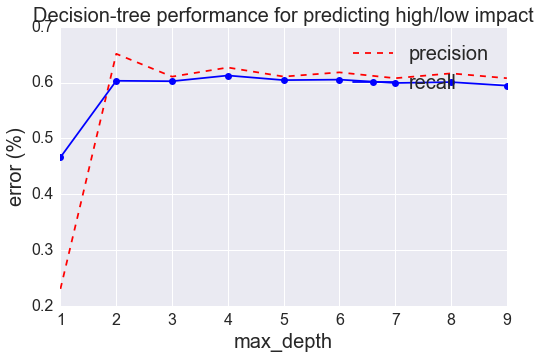

In [124]:
# plot error vs. max_depth
plt.figure(figsize=(8,5))
plt.plot(depth_list, [x for x in precision_list], 'r--', label="precision")
plt.plot(depth_list, [x for x in recall_list], 'bo-', label="recall")
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Decision-tree performance for predicting high/low impact", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)
#plt.savefig('ML_global_features_DTs_test.jpg')

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
y_prediction = clf.predict(x_test)

In [27]:
y_pre = y_prediction.tolist()

## Random forest classifier
## Random forest classifier
## Random forest classifier
## Random forest classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.15122269974113445
The training error is 5.38558064633321e-06
Done computing error.


## boosting classifier
## boosting classifier
## boosting classifier
## boosting classifier

Done model learning
The test error is 0.15293171479554646
The training error is 0.14967067174347404
Done computing error.
Done computing test errors vs. iterations
Done computing training errors vs. iterations


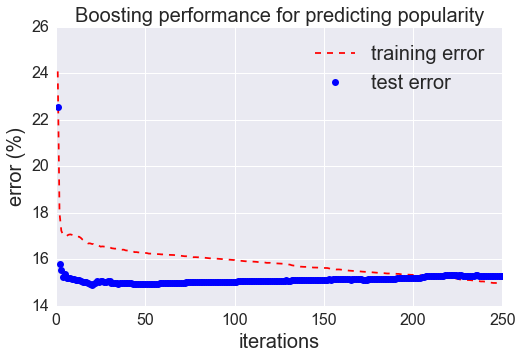

In [142]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=250)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    #itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

# Classify for each channel
# Classify for each channel
# Classify for each channel

In [189]:
df_all.iloc[:2, 7:13]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627


In [191]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df_all.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

# incorporate title indicator vector
#df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

df_training = df_all.iloc[:size_training, :]
df_test = df_all.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
x_train = df_training.iloc[:, 7:13].values
#x_train = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values
#x_train = pd.concat([df_training.ix[:,1],df_training.ix[:,7:]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

x_test = df_test.iloc[:, 7:13].values
#x_test = pd.concat([df_test.ix[:,7:14],df_test.ix[:,22:]], axis=1).values
#x_test = pd.concat([df_test.ix[:,1],df_test.ix[:,7:]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

# find median of views/subscriptions --> classification as 0 (unpopular) or 1 (popular)
#pop_threshold = (df.iloc[:size_data,4] / df.iloc[:size_data,1]).median() # video views/subscriptions
#pop_threshold = df.iloc[:size_data,4].median() # video views/subscriptions

#y_train = ((df_training.iloc[:, 4] / df_training.iloc[:, 1]) > pop_threshold) * 1
#y_train = (df_training.iloc[:, 4] > pop_threshold) * 1

#y_test = ((df_test.iloc[:, 4] / df_test.iloc[:, 1]) > pop_threshold) * 1
#y_test = (df_test.iloc[:, 4] > pop_threshold) * 1


In [198]:
x_train.shape

(185681, 1007)

In [5]:
############################
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [6]:
##############################################
# find all channel ids, ordered alphabatically
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup'):
    channel_scraped.append(row[0])
len(channel_scraped)

1221

In [34]:
########################################
### classify videos for EACH CHANNEL ###
########################################

y_label = []
categories = 2

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    y_label_each = []
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        y_label_each.append(row[4])
    y_label.extend(get_class(y_label_each, categories))
print("Done computing categories")

Done computing categories


In [187]:
#######################################
# classify targests into multi-labels FOR EACH CHANNEL
from numpy  import array

y_train = array(y_label[:size_training])

y_test = array(y_label[size_training:size_data])

In [75]:
y_label.count(2) / len(y_label)

0.5016568712088939

In [51]:
len(y_label)

265259

In [136]:
y_train.shape

(185681,)

## Decision trees
## Decision tress
## Decision tress

In [142]:
#############################
###### DTs classifier #######
#############################

from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

####################################################################
# compute training/test error vs. max_depth 

depth_list = range(1, 10)
precision_list = []
recall_list = []
#err_train_list = []
#err_test_list = []
for depth in depth_list:
    print ("********************************")
    print (depth_list.index(depth))
    print ("max_depth is {}".format(depth))
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    y_precision = precision_score(y_test, y_prediction, average='binary')
    y_recall = recall_score(y_test, y_prediction, average='binary') 
    print ("The precision is {0}".format(y_precision))
    print ("The recall is {0}".format(y_recall))
    precision_list.append(y_precision)
    recall_list.append(y_recall)
    #err_test = get_error(y_test, y_prediction)
    #err_test_list.append(err_test)
    #print ("The test error is {0}".format(err_test))
    
    #y_prediction = clf.predict(x_train)
    #err_train = get_error(y_train, y_prediction)
    #err_train_list.append(err_train)
    #print ("The train error is {0}".format(err_train))
print ("Done computing parameter dependence")
#err_dts = min(err_test_list) * 100

********************************
0
max_depth is 1
Done model learning
The precision is 0.5394854987878244
The recall is 0.6051823126510878
********************************
1
max_depth is 2
Done model learning
The precision is 0.5394854987878244
The recall is 0.6051823126510878
********************************
2
max_depth is 3
Done model learning
The precision is 0.5396248429366362
The recall is 0.6056103948428686
********************************
3
max_depth is 4
Done model learning
The precision is 0.547487389744558
The recall is 0.5111049556809025
********************************
4
max_depth is 5
Done model learning
The precision is 0.5423852433945839
The recall is 0.5805046333601934
********************************
5
max_depth is 6
Done model learning
The precision is 0.5419529411764706
The recall is 0.5800010072522159
********************************
6
max_depth is 7
Done model learning
The precision is 0.5405374289069516
The recall is 0.5911311442385173
****************************

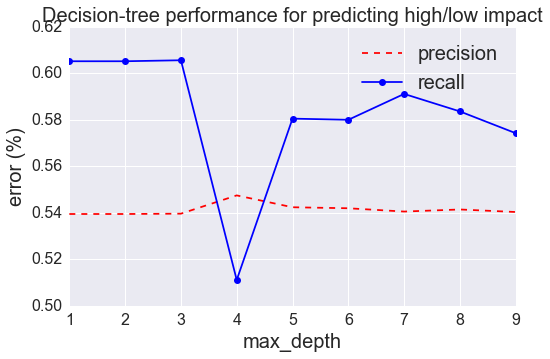

In [143]:
# plot error vs. max_depth
plt.figure(figsize=(8,5))
plt.plot(depth_list, [x for x in precision_list], 'r--', label="precision")
plt.plot(depth_list, [x  for x in recall_list], 'bo-', label="recall")
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Decision-tree performance for predicting high/low impact", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)
#plt.savefig('ML_global_features_DTs_test.jpg')

## Logistic regression
## Logistic regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
y_precision = precision_score(y_test, y_prediction, average='binary')
y_recall = recall_score(y_test, y_prediction, average='binary') 
print ("The precision is {0}".format(y_precision))
print ("The recall is {0}".format(y_recall))


Done model learning
The precision is 0.518698132780083
The recall is 0.5036512892828364


In [202]:
x_train.shape

(185681, 1007)

## Feature selection
## Feature selection

In [201]:
#######################
# Feature selection

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
x_train_new = model.transform(x_train)
x_test_new = model.transform(x_test)

In [203]:
x_train_new.shape

(185681, 953)

## Random forest
## Random forest
## Random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.46712659277689816
The training error is 1.6156741939110653e-05
Done computing error.


## Boosting
## Boosting
## Boosting

Done model learning
The precision is 0.5962229265715795
The recall is 0.5684176067687349
Done computing precision and recall for test set


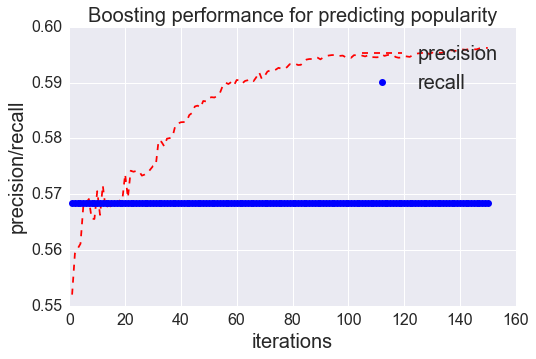

In [105]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=300)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
y_precision = precision_score(y_test, y_prediction, average='binary')
y_recall = recall_score(y_test, y_prediction, average='binary') 
print ("The precision is {0}".format(y_precision))
print ("The recall is {0}".format(y_recall))

# compute training and test error vs. iterations
itr = []
precision_list = []
recall_list = []

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    y_precision = precision_score(y_test, y_pred, average='binary')
    y_recall = recall_score(y_test, y_prediction, average='binary') 
    precision_list.append(y_precision)
    recall_list.append(y_recall)
print ("Done computing precision and recall for test set")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x for x in precision_list], 'r--', label="precision")
plt.plot(itr, [x for x in recall_list], 'bo', label="recall")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("precision/recall", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

Done model learning
The test error is 0.4074744276056197
Done computing error.
Done computing test errors vs. iterations


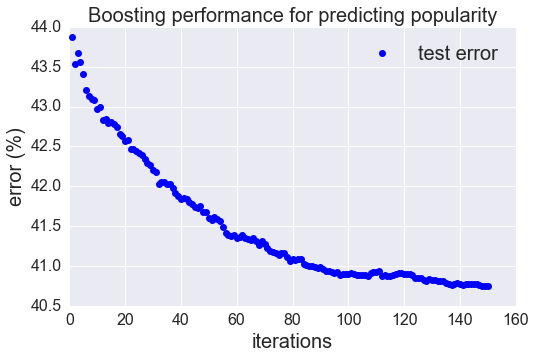

In [104]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=150)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

## extract features from tile (using token list)
## extract features from tile (using token list)
## extract features from tile (using token list)

In [3]:
df.head(2)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,...,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,...,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,...,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


In [7]:
#############################
# import all tiles into a list
############################
# connect to sqlite

title_text = ""

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        #print(row[5])
        title_text = title_text + " "
        title_text = title_text + row[5]
    #y_label.extend(get_class(y_label_each, categories))
print("Done importing titles")


Done importing titles


In [8]:
title_text[:200]

' Glitter Eye Makeup Look - Isabella Fiori DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL Grunge Cranberry Smokey Eye HOW I DID MY MAKEUP IN HIGH SCHOOL! 100 LAYERS OF SHIRTS GRWM: Travel Edition! My 10 Minu'

In [9]:
#########################################
# create a token list based on frequency

import sys
import nltk
import codecs
from nltk.corpus import stopwords

# tokenize
words = nltk.word_tokenize(title_text)
# remove punctuation & change to all lowercase
words = [w.lower() for w in words if w.isalpha()]

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
words = [word for word in words if not word.isnumeric()]

# NLTK's default Engish stopwords
default_stopwords = nltk.corpus.stopwords.words('english')
# Remove stopwords
words = [word for word in words if word not in default_stopwords]

# Calculate frequency distribution
fdist = nltk.FreqDist(words)

# Output top 1000 words

common_words = []
for word, frequency in fdist.most_common(1000):
    print(u'{};{}'.format(word, frequency))
    common_words.append(word)

makeup;49865
tutorial;30241
haul;24388
hair;17426
review;17377
beauty;13219
favorites;9849
day;8965
new;8884
look;8698
summer;7659
get;7609
palette;7198
vlog;7113
routine;7102
eye;7096
tag;6131
fall;5924
foundation;5633
products;5611
ready;5575
swatches;5528
first;5378
inspired;5324
smokey;5315
giveaway;5298
eyes;5123
lip;5122
diy;4995
unboxing;4995
skin;4939
drugstore;4923
spring;4844
mac;4687
collection;4653
natural;4565
school;4537
easy;4461
grwm;3922
update;3842
face;3650
sephora;3618
part;3615
demo;3557
fashion;3541
holiday;3528
cosmetics;3413
bag;3280
lips;3262
christmas;3239
back;3176
halloween;3168
nail;3155
outfit;3044
everyday;3001
night;2909
collab;2892
top;2884
glam;2818
box;2778
lipstick;2598
best;2578
make;2573
july;2529
tips;2484
huge;2484
challenge;2464
full;2419
favorite;2357
skincare;2323
empties;2304
color;2287
eyeshadow;2258
using;2249
urban;2248
ootd;2213
life;2204
pink;2200
style;2193
quick;2142
edition;2112
june;2104
may;2094
black;2077
winter;2050
body;2045
matt

In [10]:
len(common_words)

1000

In [11]:
###########################################
# create indicator vector for each video title
title_indicator = []

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_3.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        title = nltk.word_tokenize(row[5])
        title = [w.lower() for w in title if w.isalpha()] # the indicator vector for this title
        title_indicator.append([int(x in title) for x in common_words])
print("Done converting titles")

df_title=pd.DataFrame(title_indicator,columns=common_words)

Done converting titles


In [12]:
df_title.iloc[:2, :20]

,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette,vlog,routine,eye,tag,fall,foundation,products
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## PCA of title
## PCA of title

In [13]:
df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

In [14]:
df_all.iloc[:2, 22:26]

,makeup,tutorial,haul,hair
0,1,0,0,0
1,1,1,0,0


In [15]:
X = df_all.iloc[:, 22:].values
#X = pd.concat([df.ix[:, 7:13], df.ix[:, 14:22]], axis=1).values
#X = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

X_norm = normalize(X, norm='l2')
X_reduced = PCA(n_components=3).fit_transform(X_norm)

/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [17]:
X_reduced.shape

(265259, 3)

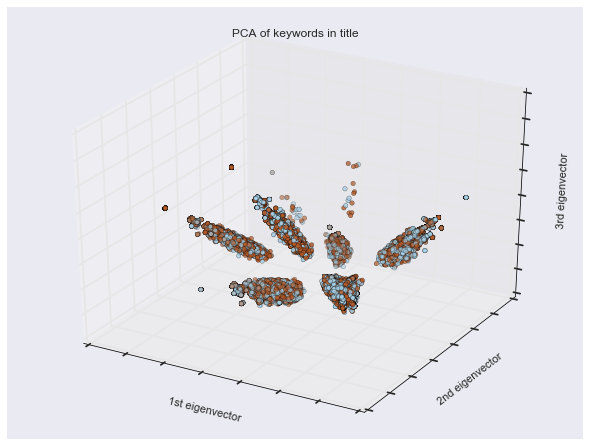

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_label, cmap=plt.cm.Paired)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_label)
ax.set_title("PCA of keywords in title")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#fig.savefig('fig_PCA_of_title.pdf')

## clustering based on title
## clustering based on title

In [18]:
X_reduced.shape

(265259, 3)

In [19]:
reduced_data = X_reduced[:]

Done clustering.


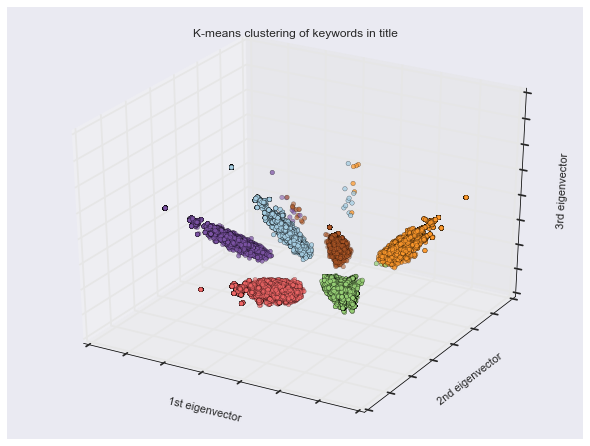

In [21]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

y_clustering_lable = KMeans(n_clusters=6, init='k-means++', n_init=10).fit_predict(reduced_data)
print("Done clustering.")
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=y_clustering_lable, cmap=plt.cm.Paired)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_clustering_lable)
ax.set_title("K-means clustering of keywords in title")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#fig.savefig('fig_kmeans_clustering_of_title.pdf')
df_clustering=pd.DataFrame(y_clustering_lable,columns=['clustering label'])

## PCA and clustering of images, date
## PCA and clustering of images, date

In [319]:
y.shape

(112, 14)

In [321]:
y = pd.concat([df_all.ix[197:308,7:13],df_all.ix[197:308,14:22]], axis=1).values

In [323]:
y = df_all.iloc[197:308, 7:13].values

In [324]:
y.shape

(111, 6)

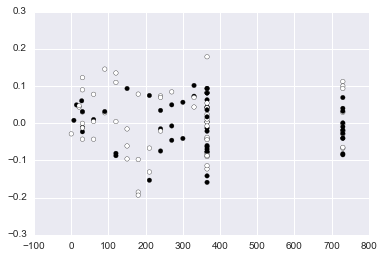

In [320]:
y = df_all.iloc[197:308, 7:13].values
#y = pd.concat([df_all.ix[197:308,7:13],df_all.ix[197:308,14:22]], axis=1).values
y_norm = normalize(y, norm='l2')
y_reduced = PCA(n_components=1).fit_transform(y_norm)
x = df_all.iloc[197:308, 22].tolist()
y_pop = y_label[197:308]
#plt.plot(x, y_reduced, c= 'ro')
plt.scatter(x, y_reduced, c=y_pop)

In [326]:
df_all.iloc[308:310, :23]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date
308,UCXMO7JjiR6NXc2YC95wAH9Q,12360,98,ZLt_QMN1J7c,1157,Dramatic Summer Night Makeup Tutorial 2016,3 months ago,0.269320,0.266140,0.418821,1.0,1.0,0.286996,42,0.670437,0.537738,0.241448,0.296291,0.194557,0.277447,0.082890,0.266113,90
309,UCXMO7JjiR6NXc2YC95wAH9Q,12360,98,KeeGNKF6QtQ,1803,Night Out Outfit Ideas | Lookbook 2016,3 months ago,0.494057,0.395133,0.599967,1.0,1.0,0.253474,39,0.540025,0.610379,0.580688,0.029691,0.196469,0.278910,0.082441,0.379859,90


In [277]:
X = pd.concat([df_all.ix[:,7:13],df_all.ix[:,14:23]], axis=1).values

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

X_norm = normalize(X, norm='l2')
X_reduced = PCA(n_components=2).fit_transform(X_norm)

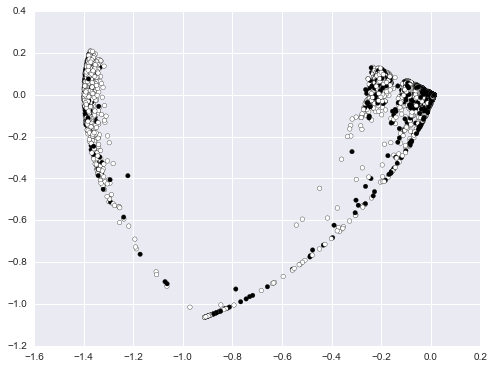

In [278]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_label, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_label)

Done clustering.


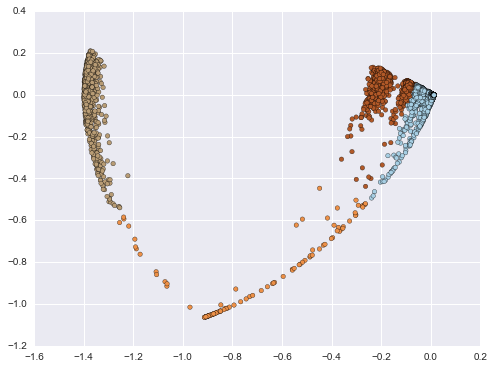

In [284]:
from sklearn.cluster import KMeans
y_clustering_lable = KMeans(n_clusters=4, init='k-means++', n_init=10).fit_predict(X_reduced)
print("Done clustering.")
fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig)
#ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=y_clustering_lable, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_clustering_lable, cmap=plt.cm.Paired)

## global featues, regional features, title length, k-clustering, title keywords
## global featues, regional features, title length, k-clustering, title keywords
## global featues, regional features, title length, k-clustering, title keywords

In [124]:
df_all.iloc[:2, ]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,clustering label,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette,vlog,routine,eye,tag,fall,foundation,products,ready,swatches,first,inspired,smokey,giveaway,eyes,lip,diy,unboxing,skin,drugstore,spring,mac,collection,natural,school,easy,grwm,update,face,sephora,part,demo,fashion,holiday,cosmetics,bag,lips,christmas,back,halloween,nail,outfit,everyday,night,collab,top,glam,box,lipstick,best,make,july,huge,tips,challenge,full,favorite,skincare,empties,color,eyeshadow,using,urban,ootd,life,pink,style,quick,edition,june,may,black,winter,body,matte,de,closed,purple,march,april,week,video,maybelline,time,favourites,ipsy,red,decay,care,august,lipsticks,nyx,impression,impressions,wig,brown,glitter,love,ulta,blue,mini,february,january,faced,birthday,girl,lookbook,ideas,gold,tour,brushes,october,room,chat,simple,naked,clothing,try,art,perfect,november,pro,party,september,brush,liquid,dark,talk,valentine,high,collective,green,contour,got,big,vlogmas,mascara,target,year,series,cream,pop,cut,youtube,vs,product,one,nails,soft,la,current,curly,feat,morning,polish,updated,free,lace,home,kit,forever,healthy,go,outfits,prom,eyeliner,friday,liner,travel,chit,rose,date,shopping,ft,essentials,baby,pan,acne,colourpop,nude,elf,wet,curls,lorac,secret,wild,project,minute,affordable,plus,bath,birchbox,used,neutral,work,valentines,december,set,weekly,anastasia,sale,tree,dollar,nars,rimmel,story,winner,years,tarte,sexy,gift,things,extensions,lashes,bold,...,mirror,stash,skull,semi,neon,shampoo,inglot,limited,rid,essence,champagne,ud,bella,couture,wavy,amazing,celebrity,hits,lifestyle,lime,youtuber,mature,comparison,snacks,marie,faux,anniversary,friendly,start,surprise,grow,company,shea,club,men,match,navy,glamorous,items,yellow,katy,orchid,rock,want,michael,sally,shade,pencil,ice,really,misses,pictures,hollywood,polishes,wigs,concert,everything,tv,jonathancurtisonyt,ponytail,news,olive,lauder,evening,opi,vampire,obsessions,results,pack,shower,glamour,ohhitsonlyalice,nordstrom,ootn,grail,medium,erin,topshop,mary,makingupashlee,opening,interview,burgundy,grocery,uk,mercier,goddess,sample,repurchase,born,barbie,massive,filming,highlighter,worst,check,alex,nudes,estee,ultimate,ttsandra,drag,bronzed,bean,install,maquillage,toxic,closure,battle,soap,itslinamar,bob,voluminous,hand,rawbeautykristi,dewy,entry,emmasrectangle,highlighting,del,glittery,create,formula,perry,crochet,bronzer,clip,months,elle,fill,jessica,casey,retro,haircare,hard,danger,finale,wengie,sweater,lazy,el,conditioner,hollysamanthaa,tone,holmes,trailer,kitchen,candle,serum,open,tools,remove,jeffree,fab,lasting,tutorials,natasha,violet,heatless,boy,much,henna,scrub,grunge,fails,today,melsoldera,pin,brandy,gorgeous,drug,secrets,irresistible,health,moen,kinky,julep,memebox,mother,blender,weather,spray,jamiepaigebeauty,glasses,megan,finds,personal,mannymua,photos,nicki,cushion,spotlight,snow,san,wednesday,veda,clay,lots,bye,eyelashes,growth,loc,lange,reveal,taste,tumblr,totaldivarea,head,fat,line,chloé,bangs,basic,eman,removal,im,rosaliesaysrawr,tattoos,keep,round,curlykimmystar,cleaning,loving,trinaduhra,backpack,festive,ruby,thru,crime,sparkle,beginner,different,justenufeyes,inspiration,see,favoritos,saturday,swift,misstiffanykaee,waterproof,season,naturally,condren,apartment,peruvian,coconut,magazine,pham,concealers,diet
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [48]:
#cluster_1 = df_all.loc[:, df.loc['clustering label'] == 1]
cluster_0 = df_all.loc[df_all['clustering label'] == 0]
cluster_1 = df_all.loc[df_all['clustering label'] == 1]
cluster_2 = df_all.loc[df_all['clustering label'] == 2]
cluster_3 = df_all.loc[df_all['clustering label'] == 3]
cluster_4 = df_all.loc[df_all['clustering label'] == 4]
cluster_5 = df_all.loc[df_all['clustering label'] == 5]

In [49]:
cluster_2.shape[0]/df_all.shape[0]

0.10115396650066538

In [50]:
df_all.shape

(265259, 1024)

## predict for each cluster
## predict for each cluster
## predict for each cluster

In [80]:
cluster_2.iloc[:2, 22]

0    0
3    7
Name: date, dtype: int64

In [85]:
cluster_2.iloc[:2, 7:23]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.58095,0.013615,0.250725,0.263452,0.012727,0.101281,0
3,0.411592,0.144167,0.617192,0.968627,1.000000,0.217338,35,1.014127,0.603462,0.63073,-0.027268,0.163748,0.248388,0.084640,0.068869,7


In [160]:
cluster_3.shape[0]/df_all.shape[0]

0.07865520114303379

In [101]:
x = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1)
list(x.columns.values)

['subscriptions_count',
 'hue',
 'saturation',
 'brightness_global',
 'dynamic_range',
 'contrast_Mic',
 'contrast_RMS',
 'len_title',
 'ratio_bc_fr',
 'bri_fr_mean',
 'bri_bc_mean',
 'bri_diff_mean',
 'contrast_bc',
 'contrast_fr',
 'contrast_diff',
 'sat_bc',
 'date']

In [161]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
cluster = cluster_3
size_data = int(1 * cluster.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

df_training = cluster.iloc[:size_training, :]
df_test = cluster.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:14].values
x_train = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1).values
#x_train = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:14], df_training.iloc[:,22]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:14].values
x_test = pd.concat([df_test.iloc[:,1],df_test.iloc[:,7:23]], axis=1).values
#x_test = pd.concat([df_test.iloc[:,1],df_test.iloc[:,7:14], df_test.iloc[:,22]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

In [162]:
#######################################
# classify targests into multi-labels
from numpy import array

y = cluster.iloc[:,4].values.tolist()
y_label_all = get_class(y, 3)

y_train = array(y_label_all[:size_training])

y_test = array(y_label_all[size_training:size_data])

In [56]:
y_train[:5]

array([3, 3, 3, 3, 3])

100
Done model learning
The test error is 0.31549520766773165
110
Done model learning
The test error is 0.31693290734824286
120
Done model learning
The test error is 0.3143769968051118
130
Done model learning
The test error is 0.31469648562300323
140
Done model learning
The test error is 0.31421725239616616
150
Done model learning
The test error is 0.3130990415335463
160
Done model learning
The test error is 0.3143769968051118
170
Done model learning
The test error is 0.3084664536741214
180
Done model learning
The test error is 0.3084664536741214
190
Done model learning
The test error is 0.3145367412140575
200
Done model learning
The test error is 0.3119808306709265


0.3084664536741214

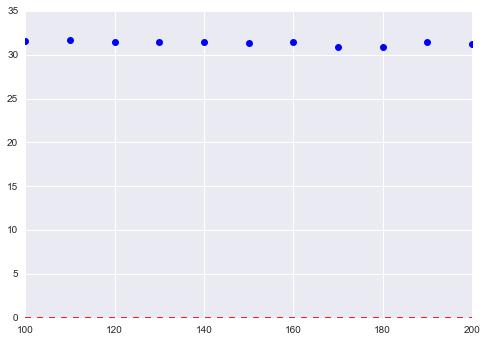

In [163]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

err_test_list = []
err_train_list = []
itr = range(100, 210, 10)

for i in itr:
    print(i)

    clf = RandomForestClassifier(n_estimators=i)

    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))

    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    #print ("The training error is {0}".format(err_train))
    #print ("Done computing error.")
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
min(err_test_list)

In [164]:
clf = RandomForestClassifier(n_estimators=180)

clf.fit(x_train, y_train)
print ("Done model learning")

Done model learning


In [165]:
# compute std 
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [166]:
importance = clf.feature_importances_
#importance = importance.tolist()
importance.shape

(17,)

In [158]:
x = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1)
feature_list = x.columns.values.tolist()

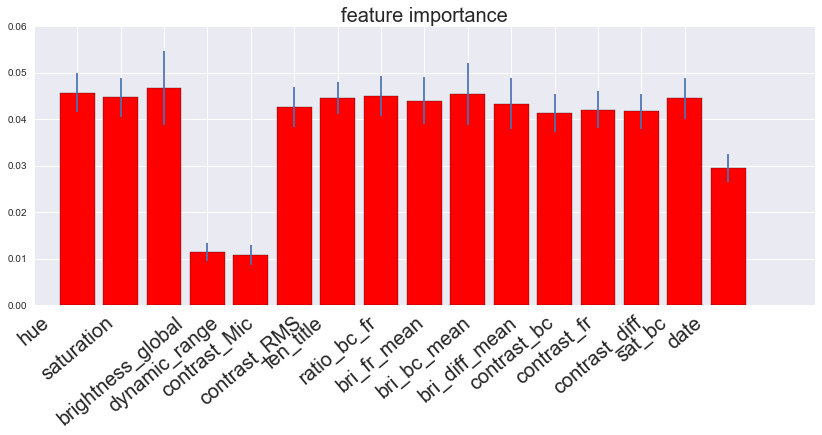

In [167]:
import seaborn as sns
from numpy  import array

fig = plt.figure(figsize=(14,5))
#sns.barplot(feature_list[1:], importance[1:])
plt.bar(range(1, 17), importance[1:], yerr=std[1:], color="r", align="center")
plt.xticks(rotation=40)
plt.xticks(fontsize=20)
plt.xticks(range(16), feature_list[1:])
#plt.xlabel("")
plt.title("feature importance", fontsize=20)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.2875776397515528
The training error is 0.31844319028857415
Done computing error.


## predict for all clusters, using cluster number & date
## predict for all clusters, using cluster number & date
## predict for all clusters, using cluster number & date

In [254]:
df_all.iloc[:2, 7:24]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date,clustering label
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,0,1
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,0,3


In [327]:
df_all.ix[:2, 7:24]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date,clustering label
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,0,1
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,0,3
2,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,0.604055,0.597575,0.604280,-0.006705,0.170278,0.196231,0.025953,0.124208,0,0


In [259]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df_all.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

df_training = df_all.iloc[:size_training, :]
df_test = df_all.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:14].values
#x_train = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values
#x_train = pd.concat([df_training.ix[:,1],df_training.ix[:,7:22]], axis=1).values
x_train = df_training.iloc[:, 1].values
x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:14].values
#x_test = pd.concat([df_test.ix[:,7:14],df_test.ix[:,22:]], axis=1).values
#x_test = pd.concat([df_test.ix[:,1],df_test.ix[:,7:22]], axis=1).values
x_test = df_test.iloc[:, 1].values
x_test = x_test[:, np.newaxis]

In [328]:
#######################################
# classify targests into multi-labels
from numpy import array

y = df_all.iloc[:,4].values.tolist()
y_label_all = get_class(y, 3)

y_train = array(y_label_all[:size_training])

y_test = array(y_label_all[size_training:size_data])

In [ ]:
#############################
###### SVM classifier #######
#############################
from sklearn.svm import SVC

# compute test/training error vs. gamma --> overfit or underfit

gamma_list = np.logspace(0, 1, 2).tolist()
err_train_list = []
err_test_list = []
for x in gamma_list:
    print("************************************")
    print(gamma_list.index(x))
    print("gamma is {0}".format(x))
    clf = SVC(gamma=x)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print("Done computing training/test errors vs. gamma")
err_svm = min(err_test_list) * 100

In [ ]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=200)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.31337806931564005
The training error is 0.3493572309498548
Done computing error.


## extract date/time
## extract date/time

In [199]:
date_list = df_all.iloc[:200, 6].tolist()

In [41]:
##################################################
# define a function to convert time string to date
import re

def get_date(time_string):
    x_num = int(re.findall(r'\d+', time_string)[0])
    if 'year' in time_string:
        date = x_num * 365
    elif 'month' in time_string:
        date = x_num * 30
    elif 'week' in time_string:
        date = x_num * 7
    else:
        date = 0
    return date
        
    

In [42]:
date_approx = []
date_list = df_all.iloc[:, 6].tolist()
for x in date_list:
    date = get_date(x)
    date_approx.append(date)
print("Done computing date!")

Done computing date!


In [44]:
len(date_approx)

265259

In [45]:
df_date=pd.DataFrame(date_approx,columns=['date'])

In [46]:
df_all = pd.concat([df.ix[:,:], df_date.ix[:,:], df_clustering.ix[:,:], df_title.ix[:,:]], axis=1)

In [47]:
df_all.iloc[:2, :30]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date,clustering label,makeup,tutorial,haul,hair,review,beauty
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,0,2,1,0,0,0,0,0
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,0,4,1,1,0,0,0,0
